# HISTOGRAM MATCHING

## LIBRARIES

In [1]:
from skimage.io import imread                         # load the image
from skimage.exposure import cumulative_distribution  # calculate the cumulative pixel value
import numpy as np                                    # reshape the image
import matplotlib.pyplot as plt                       # plot the result

## INPUT AND TEMPLATE IMAGE

In [2]:
# read/load the input and template image
image = (imread('Lenna.png', as_gray=True)*255).astype(np.uint8)
imageTemplate = (imread('Sunset.jpg', as_gray=True)*255).astype(np.uint8)

FileNotFoundError: No such file: '/Users/henrikmader/Desktop/MasterWirtschaftsinformatikTUM/ThirdSemester/FirstPeriod/DeepLearning/ProjectNeural/NeuralTransfer/Lenna.png'

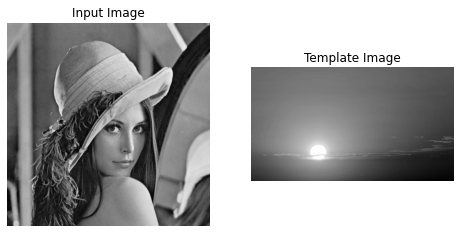

In [3]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title('Input Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Template Image')
plt.imshow(imageTemplate, cmap='gray')
plt.axis('off')
plt.show()

## CUMULATIVE DISTRIBUTION 

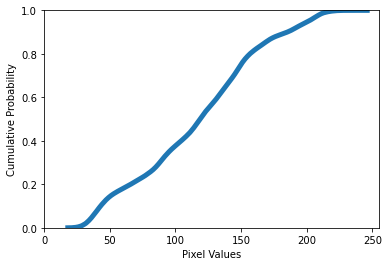

In [4]:
# compute the cumulative distribution of input image
cdfImageInput, binsImageInput = cumulative_distribution(image)

plt.plot(binsImageInput, cdfImageInput, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.show()

In [5]:
# check the first and last bins and probability
print(f"First bins: {binsImageInput[0]}, Cumulative Probability: {cdfImageInput[0]:.5f}")
print(f"Last bins: {binsImageInput[-1]}, CUmulative Probability: {cdfImageInput[0]:.5f}")

First bins: 18, Cumulative Probability: 0.00002
Last bins: 246, CUmulative Probability: 0.00002


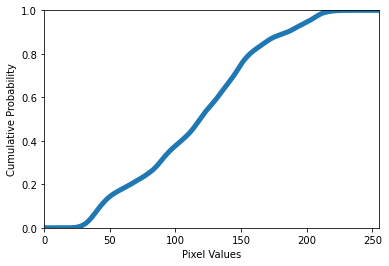

In [6]:
# pad the begining and ending pixel values
cdfImageInput = np.insert(cdfImageInput, 0, [0]*binsImageInput[0]) # fill 0 in index 0 - 17
cdfImageInput = np.append(cdfImageInput, [1]*(255-binsImageInput[-1])) # fill 1 in index 247 - 255

plt.plot(cdfImageInput, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.show()

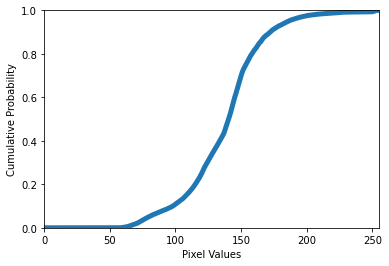

In [7]:
# compute the cumulative distribution of image template
cdfImageTemplate, binsImageTemplate = cumulative_distribution(imageTemplate)

cdfImageTemplate = np.insert(cdfImageTemplate, 0, [0]*binsImageTemplate[0])
cdfImageTemplate = np.append(cdfImageTemplate, [1]*(255-binsImageTemplate[-1]))

plt.plot(cdfImageTemplate, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.show()

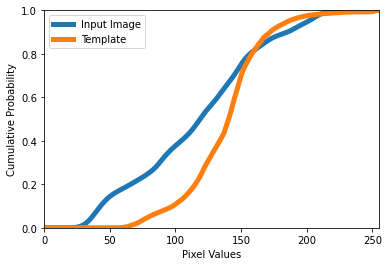

In [8]:
plt.plot(cdfImageInput, linewidth=5, label='Input Image')
plt.plot(cdfImageTemplate, linewidth=5, label='Template')
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

## HISTOGRAM MATCHING

In [2]:
# Create an array of pixel values
pixels = np.arange(256)
pixels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

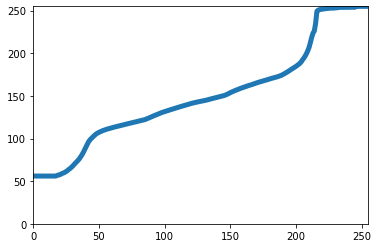

In [10]:
new_pixels = np.interp(cdfImageInput, cdfImageTemplate, pixels)
plt.plot(new_pixels, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,255)
plt.show()

In [11]:
# Map and Reshape to 2D array
imageOut = (np.reshape(new_pixels[image.ravel()], image.shape)).astype(np.uint8)

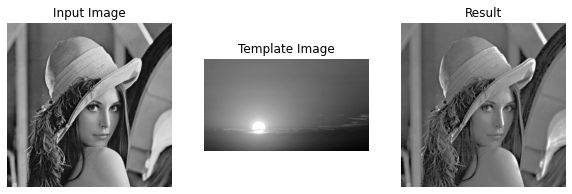

In [12]:
# Preview the result
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.title('Input Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Template Image')
plt.imshow(imageTemplate, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Result')
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

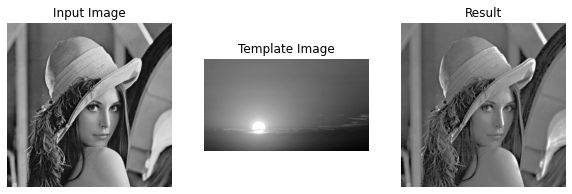

In [13]:
# get the CDF
def getCDF(image):
    cdf, bins = cumulative_distribution(image)
    cdf = np.insert(cdf, 0, [0]*bins[0])
    cdf = np.append(cdf, [1]*(255-bins[-1]))
    return cdf

# histogram matching
def histMatch(cdfInput, cdfTemplate, imageInput):
    pixelValues = np.arange(256)
    new_pixels = np.interp(cdfInput, cdfTemplate, pixels)
    imageMatch = (np.reshape(new_pixels[imageInput.ravel()], imageInput.shape)).astype(np.uint8)
    return imageMatch

# Preview the result
def plotResult(imInput, imTemplate, imResult):
    plt.figure(figsize=(10,7))
    plt.subplot(1,3,1)
    plt.title('Input Image')
    plt.imshow(imInput, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Template Image')
    plt.imshow(imTemplate, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.title('Result')
    plt.imshow(imResult, cmap='gray')
    plt.axis('off')
    plt.show()

# read/load the input and template image
image = (imread('Lenna.png', as_gray=True)*255).astype(np.uint8)
imageTemplate = (imread('Sunset.jpg', as_gray=True)*255).astype(np.uint8)

# compute the CDF
cdfInput = getCDF(image)
cdfTemplate = getCDF(imageTemplate)
imageResult = histMatch(cdfInput, cdfTemplate, image)

# plot 
plotResult(image, imageTemplate, imageResult)

## COLOR IMAGE

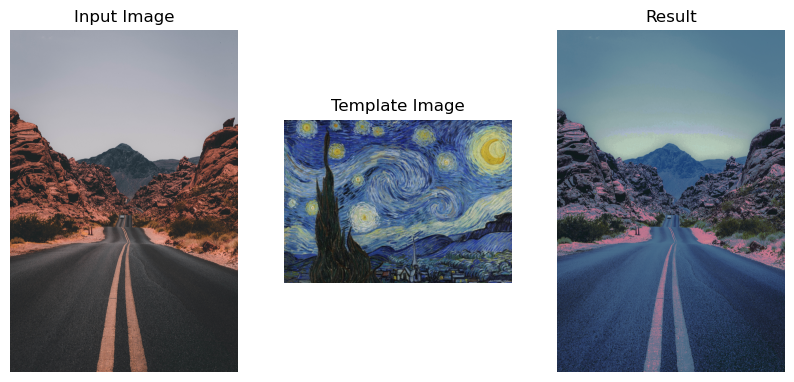

True

In [3]:
# get the CDF

import cv2


def getCDF(image):
    cdf, bins = cumulative_distribution(image)
    cdf = np.insert(cdf, 0, [0]*bins[0])
    cdf = np.append(cdf, [1]*(255-bins[-1]))
    return cdf

# histogram matching
def histMatch(cdfInput, cdfTemplate, imageInput):
    pixelValues = np.arange(256)
    new_pixels = np.interp(cdfInput, cdfTemplate, pixels)
    imageMatch = (np.reshape(new_pixels[imageInput.ravel()], imageInput.shape)).astype(np.uint8)
    return imageMatch

# Preview the result
def plotResult(imInput, imTemplate, imResult):
    plt.figure(figsize=(10,7))
    plt.subplot(1,3,1)
    plt.title('Input Image')
    plt.imshow(imInput)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Template Image')
    plt.imshow(imTemplate)
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.title('Result')
    plt.imshow(imResult)
    plt.axis('off')
    plt.show()

# read/load the input and template image
image = imread('./unsplash-images-collection/test.jpg').astype(np.uint8)
imageTemplate = imread('./Art/resized/resized/test.jpg').astype(np.uint8)


# create a matrix for result
imageResult = np.zeros((image.shape)).astype(np.uint8)

# cdf and histogram
for channel in range(3):
    cdfInput = getCDF(image[:,:,channel])
    cdfTemplate = getCDF(imageTemplate[:,:,channel])
    imageResult[:,:,channel] = histMatch(cdfInput, cdfTemplate, image[:,:,channel])

# plot 
plotResult(image, imageTemplate, imageResult)

cv2.imwrite("test.png", imageResult)